In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
train_df=pd.read_csv("/Users/Tim/Coding/CarInsuranceKaggle/Data/train.csv")
test_df=pd.read_csv("/Users/Tim/Coding/CarInsuranceKaggle/Data/test.csv")


In [12]:
train_crash=train_df[train_df.target == 1]
print train_crash
train_nc=train_df[train_df.target == 0]
print train_nc

             id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
9            28       1          1              1          2              0   
19           64       1          0              1          2              1   
28           84       1          0              2          0              1   
39          107       1          2              1          3              1   
41          110       1          5              2          1              0   
65          162       1          6              1          3              0   
87          217       1          1              1          5              1   
108         285       1          0              1          3              0   
191         484       1          3              1          8              0   
224         563       1          7              2          1              0   
249         627       1          0              2          1              1   
251         630       1          0              1   

             id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0             7       0          2              2          5              1   
1             9       0          1              1          7              0   
2            13       0          5              4          9              1   
3            16       0          0              1          2              0   
4            17       0          0              2          0              1   
5            19       0          5              1          4              0   
6            20       0          2              1          3              1   
7            22       0          5              1          4              0   
8            26       0          5              1          3              1   
10           34       0          5              2          2              0   
11           35       0          2              1          3              1   
12           36       0          2              1   

In [43]:
%matplotlib inline
Alpha=0.5
fig_1=plt.figure("test_fig")
def tmva_style_hist(df,column, nbins =-1):
    if nbins != -1:
        plt.hist(df[df.target == 1][column],alpha=Alpha,normed=True,color="r",bins=nbins)
        plt.hist(df[df.target == 0][column],alpha=Alpha,normed=True,color="b",bins=nbins)
    else:
        plt.hist(df[df.target == 1][column],alpha=Alpha,normed=True,color="r")
        plt.hist(df[df.target == 0][column],alpha=Alpha,normed=True,color="b")
    plt.show()

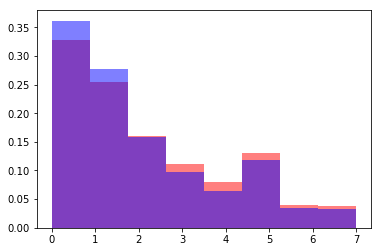

In [45]:
tmva_style_hist(train_df,"ps_ind_01",8)

# Now Try To Train BDT

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

## Prepare data

In [142]:
import numpy as np

In [165]:
#features_to_use=["ps_ind_01","ps_ind_03"]
all_columns=train_df.columns.values
#features_to_use=np.concatenate([all_columns[2:)
features_to_use=all_columns[2:]
print "______ feautres to be used________"
print features_to_use
features=train_df[features_to_use].values
print features
labels=train_df["target"].values
print labels
features_test=test_df[features_to_use].values
#labels_test=test_df["target"].values

______ feautres to be used________
['ps_ind_01' 'ps_ind_02_cat' 'ps_ind_03' 'ps_ind_04_cat' 'ps_ind_05_cat'
 'ps_ind_06_bin' 'ps_ind_07_bin' 'ps_ind_08_bin' 'ps_ind_09_bin'
 'ps_ind_10_bin' 'ps_ind_11_bin' 'ps_ind_12_bin' 'ps_ind_13_bin'
 'ps_ind_14' 'ps_ind_15' 'ps_ind_16_bin' 'ps_ind_17_bin' 'ps_ind_18_bin'
 'ps_reg_01' 'ps_reg_02' 'ps_reg_03' 'ps_car_01_cat' 'ps_car_02_cat'
 'ps_car_03_cat' 'ps_car_04_cat' 'ps_car_05_cat' 'ps_car_06_cat'
 'ps_car_07_cat' 'ps_car_08_cat' 'ps_car_09_cat' 'ps_car_10_cat'
 'ps_car_11_cat' 'ps_car_11' 'ps_car_12' 'ps_car_13' 'ps_car_14'
 'ps_car_15' 'ps_calc_01' 'ps_calc_02' 'ps_calc_03' 'ps_calc_04'
 'ps_calc_05' 'ps_calc_06' 'ps_calc_07' 'ps_calc_08' 'ps_calc_09'
 'ps_calc_10' 'ps_calc_11' 'ps_calc_12' 'ps_calc_13' 'ps_calc_14'
 'ps_calc_15_bin' 'ps_calc_16_bin' 'ps_calc_17_bin' 'ps_calc_18_bin'
 'ps_calc_19_bin' 'ps_calc_20_bin']
[[  2.   2.   5. ...,   0.   0.   1.]
 [  1.   1.   7. ...,   0.   1.   0.]
 [  5.   4.   9. ...,   0.   1.   0.]
 ..., 
 [

In [180]:
import xgboost as xgb

In [190]:
bdt1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         n_estimators=100)
#dtrain=xgb.DMatrix( features, label=labels)
#params = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
#num_round = 2
#bdt = xgb.train(params, dtrain, num_round)
bdt1.fit(features, labels)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [191]:
twoclass_output=bdt1.decision_function(features)

[-0.02918863 -0.03408667 -0.03620489 ..., -0.03956728 -0.03475682
 -0.0398803 ]
(595212,)
(21694,)


(array([  0.39341705,  15.26612431,  63.17043556,  62.40674364,
         22.39391555,   3.33247383,   0.1157109 ,   0.13113902,
          0.13885308,   0.        ]),
 array([-0.0500576 , -0.04408206, -0.03810652, -0.03213097, -0.02615543,
        -0.02017989, -0.01420435, -0.0082288 , -0.00225326,  0.00372228,
         0.00969783]),
 <a list of 10 Patch objects>)

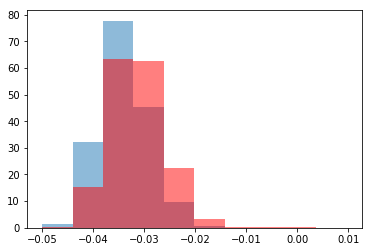

In [192]:
print twoclass_output
print twoclass_output.shape
print twoclass_output[labels == 1].shape
score=plt.figure("decision_tree_result")
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.hist(twoclass_output[labels == 0],alpha=0.5,normed=True,range=plot_range)
plt.hist(twoclass_output[labels == 1],alpha=0.5,normed=True,color='r',range=plot_range)

## Score Classifier

In [193]:
from sklearn.metrics import classification_report, roc_auc_score 
from sklearn.metrics import roc_curve, auc

[0 0 0 ..., 0 0 0]
             precision    recall  f1-score   support

          0       0.96      1.00      0.98    573518
          1       0.56      0.00      0.00     21694

avg / total       0.95      0.96      0.95    595212

Area under ROC curve: 0.6381


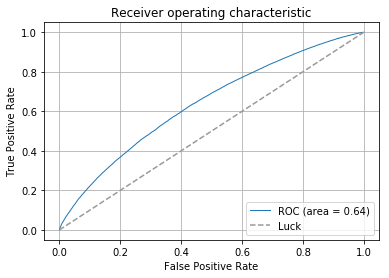

In [196]:
labels_predicted = bdt1.predict(features)
decision_scores=bdt1.decision_function(features)
print labels_predicted
print classification_report(labels, labels_predicted)
print "Area under ROC curve: %.4f"%(roc_auc_score(labels,decision_scores))

fpr, tpr, thresholds = roc_curve(labels, decision_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [198]:
importances= bdt1.feature_importances_
print importances
indices = np.argsort(importances)[::-1]
print indices
for f in range(features.shape[1]):
   print "{rank}. feature {f}, {name} : {value}".format(rank=f + 1,f=indices[f],value= importances[indices[f]],name= features_to_use[indices[f]])

[ 0.03  0.    0.09  0.02  0.05  0.01  0.    0.    0.02  0.    0.    0.    0.
  0.    0.07  0.    0.02  0.02  0.06  0.02  0.06  0.08  0.    0.02  0.01
  0.01  0.02  0.03  0.01  0.06  0.    0.02  0.02  0.01  0.15  0.04  0.01
  0.01  0.01  0.01  0.    0.01  0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.  ]
[34  2 21 14 18 29 20  4 35 27  0 32 17 16 23 26  8 31  3 19 24 25  5 28 33
 37 36 38 39 41  7 11 10  9 50 52  6 51 13 53 54  1 12 48 49 15 47 46 45 44
 43 22 42 40 55 30 56]
1. feature 34, ps_car_13 : 0.15
2. feature 2, ps_ind_03 : 0.09
3. feature 21, ps_car_01_cat : 0.08
4. feature 14, ps_ind_15 : 0.07
5. feature 18, ps_reg_01 : 0.06
6. feature 29, ps_car_09_cat : 0.06
7. feature 20, ps_reg_03 : 0.06
8. feature 4, ps_ind_05_cat : 0.05
9. feature 35, ps_car_14 : 0.04
10. feature 27, ps_car_07_cat : 0.03
11. feature 0, ps_ind_01 : 0.03
12. feature 32, ps_car_11 : 0.02
13. feature 17, ps_ind_18_bin : 0.02
14. feature 16, ps_ind_17_bin : 0.02
15. fea

In [199]:
def correlations(data, **kwds):
    """Calculate pairwise correlation between features.
    
    Extra arguments are passed on to DataFrame.corr()
    """
    # simply call df.corr() to get a table of
    # correlation values if you do not need
    # the fancy plotting
    corrmat = data.corr(**kwds)

    fig, ax1 = plt.subplots(ncols=1, figsize=(6,5))
    
    opts = {'cmap': plt.get_cmap("RdBu"),
            'vmin': -1, 'vmax': +1}
    heatmap1 = ax1.pcolor(corrmat, **opts)
    plt.colorbar(heatmap1, ax=ax1)

    ax1.set_title("Correlations")

    labels = corrmat.columns.values
    for ax in (ax1,):
        # shift location of ticks to center of the bins
        ax.set_xticks(np.arange(len(labels))+0.5, minor=False)
        ax.set_yticks(np.arange(len(labels))+0.5, minor=False)
        ax.set_xticklabels(labels, minor=False, ha='right', rotation=70)
        ax.set_yticklabels(labels, minor=False)
        
    plt.tight_layout()

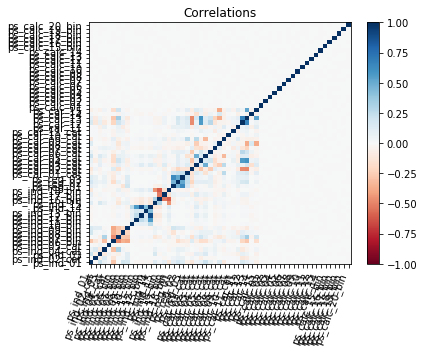

In [200]:
correlations(train_df[features_to_use])

In [201]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
 
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

In [202]:
print gini_normalized(labels,labels_predicted)

0.000959893303083


## Now Try XGBoost

In [216]:
dtrain=xgb.DMatrix( features, label=labels)
params = {'max_depth':2, 'eta':1, 'silent':0, 'objective':'binary:logistic' }
num_round = 2
xg1 = xgb.train(params, dtrain, num_round)
#bdt.fit(features, labels)

In [217]:
xgscores=xg1.predict(dtrain)
print xgscores

[ 0.07745642  0.0619843   0.05673204 ...,  0.05673204  0.05673204
  0.06436092]


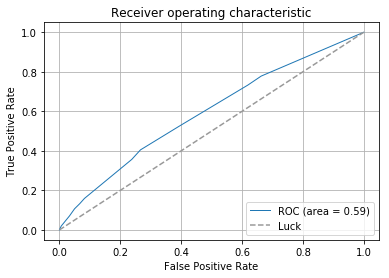

In [219]:
fpr, tpr, thresholds = roc_curve(labels, xgscores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()